<h1 align='center'>Higher Dimensions and Linear Regression</h1>

<h2>Prerequisites</h2>
<ul>
    <li>The basic concept of <a href="https://en.wikipedia.org/wiki/Row_and_column_vectors" target="_blank">vectors</a></li>
    <li>The motivation of linear regression, on the level of <a href="https://www.youtube.com/watch?v=zPG4NjIkCjc" target="_blank">this explanation</a></li>
</ul>

<h2>Introduction</h2>

If, at this Thanksgiving, I were to ask a relative what the fourth dimension was, they would probably say time.  If I were then to ask them what the fifth dimension was, they would either say they didn't know or give me a sour face and walk away.  Most of us do tend to think of the word "dimension" as representing a spatial or temporal quantity, i.e., something that fits within our physical experience.

Suppose, instead, that I were to ask a well-chosen relative why the Chargers were going to win the Super Bowl this year.  A lengthy discussion would ensue over the quality of the quarterback, the experience of the coaching staff, the number of injuries they experienced, their current win-streak, and a host of other items.  Similarly, if I were to ask a different person why they thought Alphabet's share prices were going to increase, they would discuss the current management, the new product's they have in development, the favorable review by some market analyst, their historical growth trends, and so on.  Finally, if I were to ask someone else why cousin Casey was still single, they would discuss how they are shy, they spend too much time in Youtube's comment section, or they never accept the blind-dates everyone in the family sets up for them.

In all of these cases, we reasonably assume that the answers are multi-faceted or, more appropriately here, multi-dimensional.  In fact, while some components may be more influential than the others, we expect each of these individual dimensions to contribute something to the final answer.

In this article, we will try to decouple the word "dimension" from the physical and instead develop a framework where "dimension" means something closer to component or attribute of the whole, each independent of the others and important in its own right.  In doing so, we will develop a viewpoint of vectors as a way to organize these components and how numerical values in particular instances of these vectors can give us good information if we have the right interpretations in place.  In addition, we will use some basic linear regression ideas in an attempt to deepen our intuition about the broader interplay of all of these components.

Specifically, we will look at the price of wine as it relates to a number of factors.  This work was originally done by <a href="https://irs.princeton.edu/people/orley-c-ashenfelter" target='_blank'>Orley C. Ashenfelter</a>, and we will work with data as presented by the course <a href="https://www.edx.org/course/the-analytics-edge" target='_blank'>The Analytics Edge</a>, available on edX.  <a href='https://www.youtube.com/watch?v=vI3envXmyDs' target='_blank'>This short video</a> provides some context for why Ashenfelter performed his research.

<h2>2-Dimensional Vectors</h2>
Let's begin by comparing the price of wine and the average growing temperature in the season the grapes were grown (AGST).  This means for some bottle of wine, we have two pieces of information, and it is very natural to represent these as an ordered pair:
$$[Price, AGST]$$
By doing so, we can systematically list instances of this relationship.  For example, our dataset has some of the following observations:
<ul>
    <li> $[7.5, 17.1]$ </li>
    <li> $[8.5, 17.3]$ </li>
    <li> $[6.3, 16.3]$ </li>
</ul>
where we have rounded the values and haven't specified the units of measurement.  Each of these can serve as our representation of the corresponding 2-dimensional vector, and each has the general form $[x_1, x_2]$.  Note that the order in which we display our information is certainly crucial here, as the first position is reserved exclusively for the price and the second for AGST.

Next, we would like to attempt to visualize this information. Each of these 2-dimensional vectors hopefully feels reminiscient of the usual ordered pairs $(x,y)$ that you would see in an algebra course.  Indeed, by letting the horizontal axis represent AGST and the vertical axis represent price, we can associate to each vector a point in the plane:

Text(0.5,0,'Average Temperature')

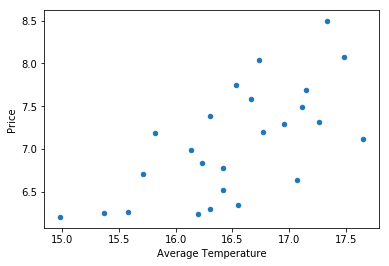

In [65]:
wine.plot.scatter(x='AGST', y='Price')
plt.xlabel('Average Temperature')

And, every dot on our graph represents a vector given by observations in our data set.  For example, we can see one of our earlier examples, $[8.5, 17.3]$, in the top right corner.  This provides us with a nice visual way to process the information in our data set.  For example, the range in each dimension of our observed values is easy to read at a glance.

From a linear algebraic perspective, price and AGST are both independent variables, and each instance of a vector is represented by the separate information given in the ordered pair. But, this graph certainly seems to suggest that higher priced wines coincide with higher average temperatures. Using our understanding of the way the world works, we can then suggest that there is a causal relationship at play.  That is, rather than high price and high temperature simply coinciding with each other, it is more likely that higher temperatures somehow make for a better grape, which in turn makes for better wine, and more may be charged for this better wine.  If this is the case, then we should be able to formulate a function for the price of wine based on the average temperature, and linear regression precisely aims to do this using a linear function.  

To do so, we will recall that a linear function is of the form $$f(x) = mx + b$$ where m is the slope of the line and b is the vertical intercept.  Because we are now assuming a functional relationship in our data, let's rewrite our dependent variable, Price, as $y$ and our independent variable, AGST, as $x_1$.  Also, to match the typical literature on this topic, we will let $\beta_0$ be our vertical intercept and $\beta_1$ be our coefficient on $x_1$.  With these changes our linear model is given by $$y=\beta_0 + \beta_1 x_1$$
where such a model is referred to as a simple linear regression model, because there is only one independent variable.

Our task now becomes to decide which line would best describe the relationship between our dependent and independent variables.  Certainly, there are many choices for such a line:

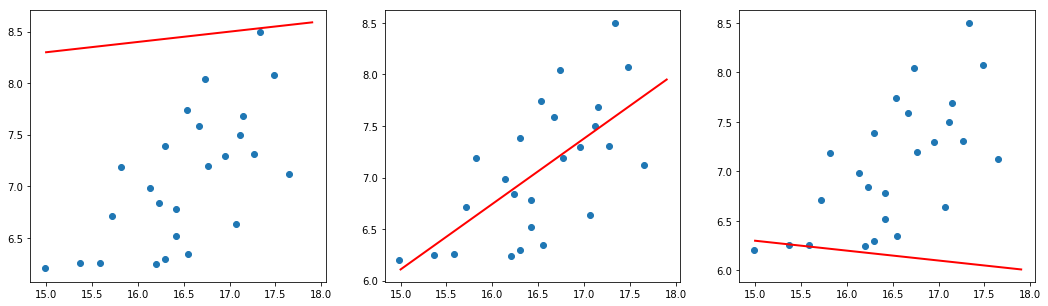

In [25]:
fig = plt.figure(figsize=(18, 5))

ax1 = fig.add_subplot(1,3,1)    
ax2 = fig.add_subplot(1,3,2)   
ax3 = fig.add_subplot(1,3,3)

ax1.scatter(wine.AGST,wine.Price)
ax2.scatter(wine.AGST,wine.Price)
ax3.scatter(wine.AGST,wine.Price)

x = np.linspace(15.,17.9)
ax1.plot(x, .1*x+6.8, linewidth=2.0, color="red")
ax2.plot(x, .63509*x-3.41776, linewidth=2.0, color="red")
ax3.plot(x, -.1*x+7.8, linewidth=2.0, color="red")

plt.show()

If you have seen linear regression before, then the middle option should immediately jump out as a better fit than the other two.  It turns out there is some indication that we are reasonably good at eye-balling the best fit line, but we aren't perfect at it (see <a href="https://idl.cs.washington.edu/files/2017-RegressionByEye-CHI.pdf" target="_blank">this paper</a>, if you are curious).  We make this process rigourous by having a robust method of choosing our coefficients, generally using the ordinary least squares method, but I will save the details for your exploration.  In terms of our model, $y=\beta_0 + \beta_1 x_1$, it is noteworthy that, numerically, this indicates that $\beta_1 > 0$.

This certainly seems to give credence to the notion that higher average temperatures lead to better quality wine.  But, this also should feel suspiciously simple; surely, other factors must play a role in how wine is priced.  In the next section, we will introduce a new variable and redo this work.

<b>Side note</b>: Above I chose to represent our vectors as points in the plane.  This may have seemed slightly strange as it is common, especially in class, to represent vectors as an arrow that starts at the origin and ends at the appropriate vector values.  This is a perfectly fine way to visualize this information, and in some circumstances is certainly preferrable.  But, because our data set contains 25 observations, this gets very visually cluttered:

Text(0.5,0,'Average Temperature')

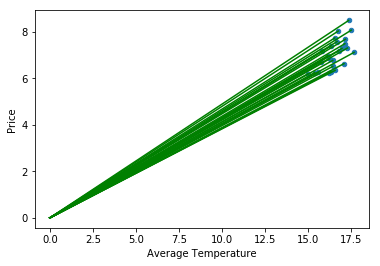

In [72]:
wine.plot.scatter(x='AGST', y='Price')

for index, row in wine.iterrows():
    x=row["AGST"]
    y=row["Price"]
    plt.plot([0,x],[0,y], color="green")
plt.xlabel('Average Temperature')

Even if we adjust the scale, and mentally track that these vectors start at the origin, the result isn't much better:

Text(0.5,0,'Average Temperature')

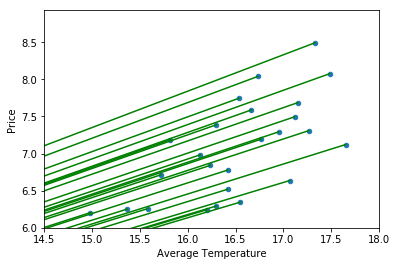

In [77]:
wine.plot.scatter(x='AGST', y='Price')

for index, row in wine.iterrows():
    x=row["AGST"]
    y=row["Price"]
    plt.plot([0,x],[0,y], color="green")
plt.xlim(xmin=14.5, xmax=18)
plt.ylim(ymin=6)    
plt.xlabel('Average Temperature')

While I do not want to tumble down the rabbit-hole of elements in a vector space here, I do want to observe that a vector is a purely algebraic object.  A vector is not the ordered tuple $[x_1, x_2]$, nor is it an arrow with direction and magnitude, nor is it a point in space.  All of these are ways in which we represent the underlying vector.  As such, we are very much <i>choosing</i> a geometric representation here, and a point in the plane is more suited to our present purposes than an arrow.
<b>End of side note.</b>

<h2>3-Dimensional Vectors</h2>
Let's introduce a new aspect into our work, the amount of rain during the winter (WinterRain).  From a linear algebraic perspective we may represent our data observations as triplets: $$[Price, AGST, WinterRain]$$
For example, our dataset has some of the following observations:
<ul>
    <li> $[7.5, 17.1, 600]$ </li>
    <li> $[8.5, 17.3, 830]$ </li>
    <li> $[6.3, 16.3, 574]$ </li>
</ul>
where each of these can serve as our representation of the corresponding 3-dimensional vector, and each has the general form $[x_1, x_2, x_3]$.  As before, for some particular observation, the order of the numbers is crucial in our presentation.  But, it is noteworthy that the order for original triplet is entirely arbitrary.  The following are all equally valid: $$[Price, AGST, WinterRain] \\ \\ [AGST, Price, WinterRain] \\ \\ [WinterRain,Price,AGST]$$
We are choosing one of these to work with, and while the initial choice is indeed arbitrary (or at least, as valid as any other), we do need to be consistent once we make this choice.

Now that we have established this, we can attempt to visualize the placement of our vectors inside 3-dim space:

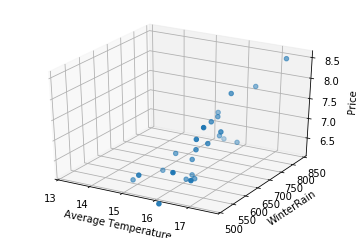

In [6]:
from mpl_toolkits.mplot3d import Axes3D

three_dim = plt.figure().gca(projection='3d')
three_dim.scatter(wine['AGST'], wine['WinterRain'], wine['Price'])

three_dim.set_xlabel('Average Temperature')
three_dim.set_ylabel('WinterRain')
three_dim.set_zlabel('Price')
plt.xlim(xmin=13)
plt.ylim(ymin=500)

plt.show()


Where the value in each vector representation, e.g., $[7.5, 17.1, 600]$, indicates how far we should move along that axis.

As before, if we want to assume a causal relationship, we can designate Price as our dependent variable and AGST and WinterRain as our independent variables.  If we label these as $y$, $x_1$, and $x_2$, respectively, then we can express our model as
$$y=\beta_0 + \beta_1 x_1 + \beta_2 x_2$$
where such a model is referred to as a multiple linear regression model, because there are more than one independent variable.

In this case, the best fitting surface will be given by a plane (i.e., a 2-dim space) because it is based on two variables:

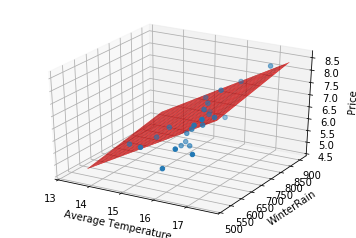

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

# scatter
ax.scatter(wine['AGST'], wine['WinterRain'], wine['Price'])

# surface
x = np.linspace(13.5,17.5)
y = np.linspace(550,900)
X,Y = np.meshgrid(x,y)
Z = (-6.55676 + .755205*X + .001910*Y)
ax.plot_surface(X, Y, Z, color="red")

ax.set_xlabel('Average Temperature')
ax.set_ylabel('WinterRain')
ax.set_zlabel('Price')
plt.xlim(xmin=13)
plt.ylim(ymin=500)

plt.show()


Before we were able to look at the slope of the line, and because it was positively-sloped we concluded that as AGST increased the price would increase as well.  Here, we can see a similar relationship in each independent variable.  The plane is tilted up as AGST increases and it is tilted up as WinterRain increases.  The type of conclusions we draw as we look at each axis individually should feel like repeating the same type of analysis that we did with the line.  This visually indicates that each of these variables is contributing to higher prices.  In terms of our model, $y=\beta_0 + \beta_1 x_1 + \beta_2 x_2$, this can be expressed numerically as $\beta_1 > 0$ and $\beta_2 >0$.

Hopefully this still feels suspiciously simple; there must be other factors at play.  At the same time, the analysis we did here in the 3-dimensional case so strongly mimicked that of the 2-dimensional case.  And, it should feel slightly tedious to keep adding variables one at a time.   In the next section, we will add a few more variables into our model in one go.

<h2>Higher Dimensional Vectors</h2>
In this section, we will extend our problem so that it includes the following components:
<ul>
    <li>Price: need to include descriptions</li>
    <li>AGST</li>
    <li>WinterRain</li>
    <li>HarvestRain</li>
    <li>Year</li>
	<li>Age</li>
	<li>FrancePop</li>
</ul> 
The primary objective for this article was to develop a recognition of each of these components as a dimension in some space.  In this case, we would need a 7-dimensional space if we wanted to plot each observation.  In fact, even if we wanted to simply add one new component, say HarvestRain, to the work we did above, we would find that we hit our visual limits frustratingly early.  Fortunately, while we are no longer able plot our observations, our work in two and three dimensions showed us that we should expect the same type of behaviour in each dimension.  This is precisely why vectors have such great utility; they allow us to perform operations that are defined equivalently in two, three, or seven dimensions, even if we are not able to actually visualize such work.

From a linear algebraic perspective we may represent our data observations as ordered lists of seven items: $$[Price, AGST, WinterRain, HarvestRain, Year, Age, FrancePop]$$
For example, our dataset has some of the following observations:
<ul>
    <li> $[7.5, 17.1, 600, 160, 1952, 31, 43183]$ </li>
    <li> $[8.5, 17.3, 830, 38, 1961, 22, 47128]$ </li>
    <li> $[6.3, 16.3, 574, 184, 1974, 9, 53689]$ </li>
</ul>
where each of these can serve as our representation of the corresponding 3-dimensional vector, and each has the general form $[x_1, x_2, x_3, x_4, x_5, x_6, x_7]$.  As before, each of these numbers tells you how far to move along a particular axis, even if you can't really see that axis in this case.

Sanity check: what would change if I removed Year?  what would change if I added the name of the winery?

...

I would be willing to wager that you can guess what our model will look like

...

so if we can't visualize the positive slope for each dimension what can we do?  While we can look at this sign of each coefficient.  

show the full model that I have been hiding

finish off by mentioning overfitting

<h2>Vectors in 5 or More Dimensions</h2>
Then finish with 5dim and above
observe that adding as many dimensions as possible necessarily.  This is the notion of overfitting, but it is out of the scope of our current discussion.

I think for length, I want to combine this with 4 dimensions

main goals here are to show how we can add as many attributes as we theoretically want, and that simply lengthens our observational vectors
note that adding extraneous variables isn't always advisable from a regression standpoint (overfitting)(maybe be glib and point out the alignment of the stars at harvest time probably wouldn't help our model)
end by bringing vector notation into the model by observing the repetition in b0 +b1x1 +b2x2 +b3x3 +.... over a few different lines

<h2>Closing Thoughts</h2>
So what does 8dim look like.  Don't know but wrong construct.  More like 8 lightbulbs in various levels of brightness.  See if I can close, with this brightness idea, by motivating vector addition and scalar multiplication as component wise operations

<h2>Appendix: Tools Used</h2>
While it does not inform the above discussion, I have included here the full work-through for developing the model.


In [1]:
import pandas as pd

In [2]:
wine = pd.read_csv("~/library/higher-dimensions-and-linear-regression/wine.csv", header=0)
wine_test = pd.read_csv("~/library/higher-dimensions-and-linear-regression/wine_test.csv", header=0)

In [3]:
wine.columns

Index(['Year', 'Price', 'WinterRain', 'AGST', 'HarvestRain', 'Age',
       'FrancePop'],
      dtype='object')

In [4]:
wine

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
0,1952,7.4950,600,17.1167,160,31,43183.569
1,1953,8.0393,690,16.7333,80,30,43495.030
2,1955,7.6858,502,17.1500,130,28,44217.857
3,1957,6.9845,420,16.1333,110,26,45152.252
4,1958,6.7772,582,16.4167,187,25,45653.805
5,1959,8.0757,485,17.4833,187,24,46128.638
6,1960,6.5188,763,16.4167,290,23,46583.995
7,1961,8.4937,830,17.3333,38,22,47128.005
8,1962,7.3880,697,16.3000,52,21,48088.673
9,1963,6.7127,608,15.7167,155,20,48798.990


In [5]:
wine.describe()

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,1965.800000,7.067224,605.280000,16.509336,148.560000,17.200000,49694.436760
std,7.691987,0.650341,132.277965,0.675397,74.419464,7.691987,3665.270243
min,1952.000000,6.204900,376.000000,14.983300,38.000000,5.000000,43183.569000
25%,1960.000000,6.518800,536.000000,16.200000,89.000000,11.000000,46583.995000
50%,1966.000000,7.121100,600.000000,16.533300,130.000000,17.000000,50254.966000
75%,1972.000000,7.495000,697.000000,17.066700,187.000000,23.000000,52894.183000
max,1978.000000,8.493700,830.000000,17.650000,292.000000,31.000000,54602.193000


Text(0.5,0,'Average Temperature')

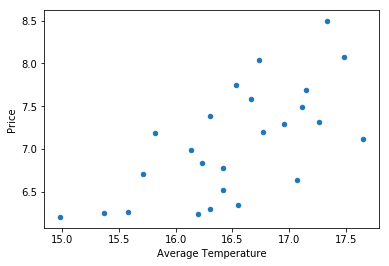

In [12]:
import matplotlib.pyplot as plt

wine.plot.scatter(x='AGST', y='Price')
plt.xlabel('Average Temperature')

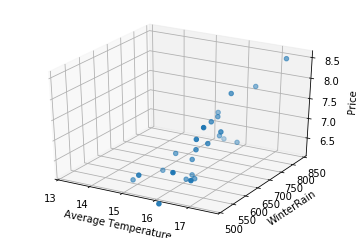

In [7]:
from mpl_toolkits.mplot3d import Axes3D

three_dim = plt.figure().gca(projection='3d')
three_dim.scatter(wine['AGST'], wine['WinterRain'], wine['Price'])

three_dim.set_xlabel('Average Temperature')
three_dim.set_ylabel('WinterRain')
three_dim.set_zlabel('Price')
plt.xlim(xmin=13)
plt.ylim(ymin=500)

plt.show()


In [8]:
from sklearn.linear_model import LinearRegression

#exclude our chosen dependent variable from our dataframe
x1 = wine.drop('Price', axis =1)

#establish the linear regression object
lm = LinearRegression()

#fit this model to our data
lm.fit(x1, wine.Price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
print(lm.intercept_)

0.12937926291780144


In [10]:
#visualize our features and corresponding coefficients
pd.DataFrame(list(zip(x1.columns, lm.coef_)), columns=["Features","EstimatedCoefficients"])

,Features,EstimatedCoefficients
0,Year,-0.000292
1,WinterRain,0.001043
2,AGST,0.601224
3,HarvestRain,-0.003958
4,Age,0.000292
5,FrancePop,-0.000050


And, this is as much as we need for the above discussion.  Certainly, from a data analysis perspective, there is a bit more to do to understand this question.  Notable next steps would be to run our model against our testing data, remove parameters according to MSE scores, and inspect residuals.  I will save this for another project in which it is not buried in an appendix.

Let's now adjust the above to develop the simple linear regression, on Average Temperature

In [24]:
#drop all variables except AGST
x2 = wine.drop(['Price','Year','WinterRain','HarvestRain','Age','FrancePop'], axis =1)

#establish the linear regression object
lm = LinearRegression()

#fit this model to our data
lm.fit(x2, wine.Price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
print(lm.intercept_)

-3.4177613134854603


In [26]:
#visualize our features and corresponding coefficients
pd.DataFrame(list(zip(x2.columns, lm.coef_)), columns=["Features","EstimatedCoefficients"])

,Features,EstimatedCoefficients
0,AGST,0.635094


Text(0.5,0,'Average Temperature')

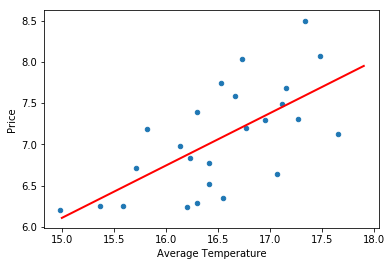

In [9]:
import numpy as np 

wine.plot.scatter(x='AGST', y='Price')

x = np.linspace(15.,17.9)

plt.plot(x, .63509*x-3.41776, linewidth=2.0, color="red")
#plt.plot([14.5,18], [5.79105,8.01386], linewidth=2.0)
plt.xlabel('Average Temperature')

Let's now extend this model to include two variables, Average Temperature and WinterRain

In [33]:
#drop all variables except AGST and WinterRain
x3 = wine.drop(['Price','Year','HarvestRain','Age','FrancePop'], axis =1)

#establish the linear regression object
lm = LinearRegression()

#fit this model to our data
lm.fit(x3, wine.Price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
print(lm.intercept_)

-6.556766421260798


In [36]:
#visualize our features and corresponding coefficients
pd.DataFrame(list(zip(x3.columns, lm.coef_)), columns=["Features","EstimatedCoefficients"])

,Features,EstimatedCoefficients
0,WinterRain,0.001910
1,AGST,0.755205


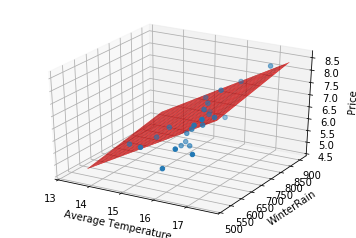

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

# scatter
ax.scatter(wine['AGST'], wine['WinterRain'], wine['Price'])

# surface
x = np.linspace(13.5,17.5)
y = np.linspace(550,900)
X,Y = np.meshgrid(x,y)
Z = (-6.55676 + .755205*X + .001910*Y)
ax.plot_surface(X, Y, Z, color="red")

ax.set_xlabel('Average Temperature')
ax.set_ylabel('WinterRain')
ax.set_zlabel('Price')
plt.xlim(xmin=13)
plt.ylim(ymin=500)

plt.show()
